In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import preprocessing 

# Use for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Load data

In [2]:
train = pd.read_csv('df1_train.csv')
X_test = pd.read_csv('df1_test1.csv')
Y_test = pd.read_csv('df1_test1y.csv')

# Preprocessing data

In [3]:
X_train = train.drop(['life_post_consumer'], axis=1)
Y_train = train['life_post_consumer']

# combine X_test and Y_test to test dataframe
test = pd.concat([X_test, Y_test], axis=1)

# alpha list (used at Ridge and Lasso regression)
alpha_list = [0.01, 0.1, 1, 5, 10, 20, 50, 100, 500, 1000]

## de-mean 

In [4]:
Y_train_mean = train['life_post_consumer'].mean()
de_mean_Y_train = Y_train - Y_train_mean
de_mean_Y_test = Y_test - Y_train_mean

In [5]:
# numerical columns
numerical_columns_list = ['life_post_consumer', 'comp_page_like', 'life_post_reach', 'life_post_impression_liked', 'life_post_reach_liked', 'comment', 'like', 'share']
train_numerical = train[numerical_columns_list]
X_train_numerical = train_numerical.drop(['life_post_consumer'], axis=1)
X_test_numerical = X_test[numerical_columns_list[1:]]
Y_test_numerical = Y_test

# nonnumerical columns
X_train_nonnumerical = train.drop(numerical_columns_list, axis=1)
X_test_nonnumerical = X_test.drop(numerical_columns_list[1:], axis=1)

## standardization

In [6]:
xscaler = preprocessing.StandardScaler().fit(X_train_numerical)
#standardize numerical feature values
X_train_numerical_std_arr = xscaler.transform(X_train_numerical)
X_test_numerical_std_arr = xscaler.transform(X_test_numerical)

# standardize all feature values (binary features + numerical features)
xscaler = preprocessing.StandardScaler().fit(X_train)
X_train_std_arr = xscaler.transform(X_train)
X_test_std_arr = xscaler.transform(X_test)

In [7]:
# convert to numpy array 
Y_test_arr = np.array(Y_test['life_post_consumer'])
X_train_arr = np.array(X_train)
Y_train_arr = np.array(Y_train)
X_test_arr = np.array(X_test)

de_mean_Y_train_arr = np.array(de_mean_Y_train)
de_mean_Y_test_arr = np.array(de_mean_Y_test['life_post_consumer'])

X_train_nonnumerical_arr = np.array(X_train_nonnumerical)
X_test_nonnumerical_arr = np.array(X_test_nonnumerical)

# standardize numerical feature but without nonnumerical features
X_train_numerical_std_only_arr = np.append(X_train_numerical_std_arr, X_train_nonnumerical_arr, axis=1)
X_test_numerical_std_only_arr = np.append(X_test_numerical_std_arr, X_test_nonnumerical_arr, axis=1)



# RMSE function

In [8]:
def rmse_func(predict_arr, test_arr):
    return np.sqrt(np.mean(np.square(test_arr - predict_arr)))
    #return np.linalg.norm(test_arr - predict_arr) / (predict_arr.shape[0]**0.5)

# Q1
Conduct exploratory analysis on this dataset. You should at least provide summary statistics and visualizations of the key variables. Moreover, you should discuss the characteristics of this dataset.

## Descriptive Statistics

### summary statistics

In [63]:
# train data summary
train.describe(include='all')
train.describe(include='all').to_csv('describe.csv')

### Click through rate (CTR)
A ratio showing how often people who see your ad end up clicking it. 

Clickthrough rate (CTR) can be used to gauge how well your keywords and ads are performing.

In [11]:
# CTR = life_post_consumer / life_post_reach
average_train_CTR = (train['life_post_consumer'] / train['life_post_reach']).mean()
average_train_CTR

0.11431831536968667

## visualizations

### Numerical variables Line chart

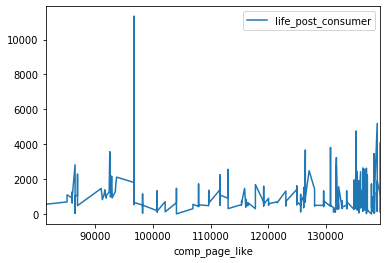

In [12]:
# x='comp_page_like', y='life_post_consumer'
train_numerical_sorted = train_numerical.sort_values('comp_page_like')
train_numerical_sorted.plot(x='comp_page_like', y='life_post_consumer')

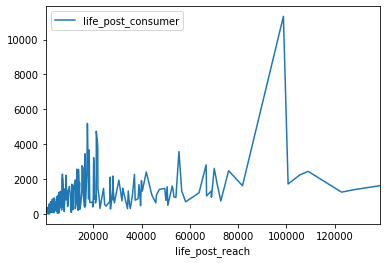

In [13]:
# x='life_post_reach', y='life_post_consumer'
train_numerical_sorted = train_numerical.sort_values('life_post_reach')
train_numerical_sorted.plot(x='life_post_reach', y='life_post_consumer')

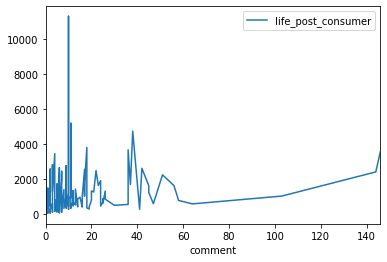

In [14]:
# x='comment', y='life_post_consumer'
train_numerical_sorted = train_numerical.sort_values('comment')
train_numerical_sorted.plot(x='comment', y='life_post_consumer')

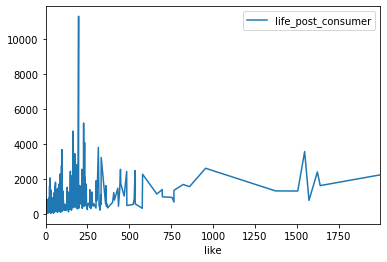

In [15]:
# x='like', y='life_post_consumer'
train_numerical_sorted = train_numerical.sort_values('like')
train_numerical_sorted.plot(x='like', y='life_post_consumer')

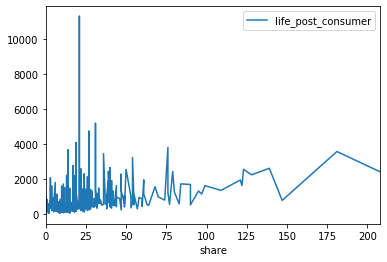

In [16]:
# x='share', y='life_post_consumer'
train_numerical_sorted = train_numerical.sort_values('share')
train_numerical_sorted.plot(x='share', y='life_post_consumer')

### boxplot

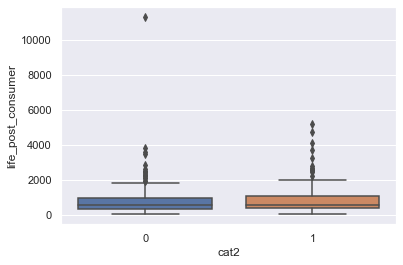

In [17]:
sns.set(style="darkgrid")
train_boxplot = sns.boxplot(x = 'cat2', y='life_post_consumer', data=train, orient="v")

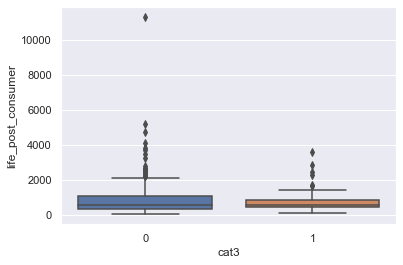

In [64]:
sns.set(style="darkgrid")
train_boxplot = sns.boxplot(x = 'cat3', y='life_post_consumer', data=train, orient="v")

## Discussion

從 Numerical variables Line chart 中我們可以看出，life_post_consumer 隨著 life_post_reachc、comment、like、share 的增加而增加，但 comp_page_like 的上升對於 life_post_consumer 而言並沒有增加。

# Q2 (Case 1)
The "ymean" method in Case 1 simply uses the mean of y in the training data to do prediction.

Construct a prediction model using the setting of Case 1. What is the test RMSE? What are the predictions and true outcome values for the first 20 data points in the testing data?

In [18]:
# prediction model
y_mean = train['life_post_consumer'].mean()
case1_predict = np.array(y_mean)
for i in range(Y_test.shape[0]-1):
    case1_predict = np.append(case1_predict, y_mean, axis=None)

In [19]:
# RMSE
rmse_func(case1_predict, Y_test_arr)

928.8095109332162

In [20]:
# predictions and true outcome values for the first 20 data points in the testing data
for i in range(20):
    print('prediction: ', y_mean, '; true outcome: ', Y_test['life_post_consumer'][i])

prediction:  810.34 ; true outcome:  1183
prediction:  810.34 ; true outcome:  189
prediction:  810.34 ; true outcome:  2327
prediction:  810.34 ; true outcome:  76
prediction:  810.34 ; true outcome:  354
prediction:  810.34 ; true outcome:  713
prediction:  810.34 ; true outcome:  204
prediction:  810.34 ; true outcome:  288
prediction:  810.34 ; true outcome:  555
prediction:  810.34 ; true outcome:  586
prediction:  810.34 ; true outcome:  446
prediction:  810.34 ; true outcome:  884
prediction:  810.34 ; true outcome:  524
prediction:  810.34 ; true outcome:  672
prediction:  810.34 ; true outcome:  23
prediction:  810.34 ; true outcome:  570
prediction:  810.34 ; true outcome:  1361
prediction:  810.34 ; true outcome:  5934
prediction:  810.34 ; true outcome:  2319
prediction:  810.34 ; true outcome:  1633


# Q3 (Case 2A)
Construct a prediction model using the setting of Case 2A. What is the test RMSE? What is the predictions and the true outcome values for the first 20 data points in the testing data?

In [21]:
# prediction model
case2A_reg = linear_model.LinearRegression()
case2A_reg.fit(X_train_arr, Y_train_arr)
case2A_predict = case2A_reg.predict(X_test_arr)

In [22]:
# rmse
case2A_rmse = rmse_func(case2A_predict, Y_test_arr)
case2A_rmse

692.2891271362014

In [23]:
# predictions and true outcome values for the first 20 data points in the testing data
for i in range(20):
    print('prediction: ', case2A_predict[i], '; true outcome: ', Y_test['life_post_consumer'][i])

prediction:  781.5799150705261 ; true outcome:  1183
prediction:  315.9204311198173 ; true outcome:  189
prediction:  2279.0848524011826 ; true outcome:  2327
prediction:  -136.34286372729912 ; true outcome:  76
prediction:  302.35624062148236 ; true outcome:  354
prediction:  462.42402367947943 ; true outcome:  713
prediction:  321.67770824369654 ; true outcome:  204
prediction:  504.52244767621596 ; true outcome:  288
prediction:  505.8954710411417 ; true outcome:  555
prediction:  488.36700578015734 ; true outcome:  586
prediction:  392.6142351937815 ; true outcome:  446
prediction:  388.9184670987779 ; true outcome:  884
prediction:  804.8752750894855 ; true outcome:  524
prediction:  634.3236443157402 ; true outcome:  672
prediction:  176.31765618431382 ; true outcome:  23
prediction:  645.7291380968727 ; true outcome:  570
prediction:  1983.5385887130587 ; true outcome:  1361
prediction:  3144.397100454389 ; true outcome:  5934
prediction:  4060.61071217642 ; true outcome:  2319


# Q4 (Case 2B)
Construct a prediction model using the setting of Case 2B. What is the test RMSE? What is the predictions and the true outcome values for the first 20 data points in the testing data?

In [24]:
# prediction model
case2B_reg = linear_model.LinearRegression()
case2B_reg.fit(X_train_arr, de_mean_Y_train_arr)
case2B_predict = case2B_reg.predict(X_test_arr)
case2B_predict += Y_train_mean

In [25]:
# rmse
case2B_rmse = rmse_func(case2B_predict, Y_test_arr)
case2B_rmse

692.2891271361826

In [26]:
# predictions and true outcome values for the first 20 data points in the testing data
for i in range(20):
    print('prediction: ', case2B_predict[i], '; true outcome: ', Y_test['life_post_consumer'][i])

prediction:  781.5799150699112 ; true outcome:  1183
prediction:  315.9204311202501 ; true outcome:  189
prediction:  2279.084852401056 ; true outcome:  2327
prediction:  -136.34286372688996 ; true outcome:  76
prediction:  302.3562406218424 ; true outcome:  354
prediction:  462.4240236797049 ; true outcome:  713
prediction:  321.67770824405113 ; true outcome:  204
prediction:  504.5224476766251 ; true outcome:  288
prediction:  505.89547104143446 ; true outcome:  555
prediction:  488.36700578043735 ; true outcome:  586
prediction:  392.61423519413063 ; true outcome:  446
prediction:  388.91846709911067 ; true outcome:  884
prediction:  804.8752750898637 ; true outcome:  524
prediction:  634.3236443160221 ; true outcome:  672
prediction:  176.31765618468842 ; true outcome:  23
prediction:  645.7291380971382 ; true outcome:  570
prediction:  1983.538588713188 ; true outcome:  1361
prediction:  3144.3971004537407 ; true outcome:  5934
prediction:  4060.6107121746036 ; true outcome:  2319

# Q5 (Case 2C)
Construct a prediction model using the setting of Case 2C. What is the test RMSE? What is the predictions and the true outcome values for the first 20 data points in the testing data?

In [27]:
# prediction model
case2C_reg = linear_model.LinearRegression()
case2C_reg.fit(X_train_std_arr, Y_train_arr)
case2C_predict = case2C_reg.predict(X_test_std_arr)

In [28]:
# rmse
case2C_rmse = rmse_func(case2C_predict, Y_test_arr)
case2C_rmse

692.2891271372004

In [29]:
# predictions and true outcome values for the first 20 data points in the testing data
for i in range(20):
    print('prediction: ', case2C_predict[i], '; true outcome: ', Y_test['life_post_consumer'][i])

prediction:  781.5799150726216 ; true outcome:  1183
prediction:  315.920431119648 ; true outcome:  189
prediction:  2279.0848523990185 ; true outcome:  2327
prediction:  -136.3428637274285 ; true outcome:  76
prediction:  302.3562406214676 ; true outcome:  354
prediction:  462.424023676746 ; true outcome:  713
prediction:  321.6777082438841 ; true outcome:  204
prediction:  504.5224476732244 ; true outcome:  288
prediction:  505.8954710383021 ; true outcome:  555
prediction:  488.3670057801714 ; true outcome:  586
prediction:  392.6142351938508 ; true outcome:  446
prediction:  388.9184670986671 ; true outcome:  884
prediction:  804.8752750893686 ; true outcome:  524
prediction:  634.3236443159298 ; true outcome:  672
prediction:  176.31765618415284 ; true outcome:  23
prediction:  645.7291380940395 ; true outcome:  570
prediction:  1983.5385887135415 ; true outcome:  1361
prediction:  3144.397100453245 ; true outcome:  5934
prediction:  4060.610712187082 ; true outcome:  2319
predict

# Q6 (Case 3A)
Construct a prediction model using the setting of Case 3A. You should consider at least the following values for the regularization coefficient (α): 0.01, 0.1, 1, 5, 10, 20, 50, 100, 500, 1000. Plot the test RMSE with respect to α. What is the best test RMSE? What is the predictions and the true outcome values for the first 20 data points in the testing data using the best α ?

In [30]:
# prediction model
case3A_rmse_dict = {}
for alpha in alpha_list: 
    case3A_reg = linear_model.Ridge(alpha = alpha)
    case3A_reg.fit(X_train_arr, Y_train_arr)
    case3A_predict = case3A_reg.predict(X_test_arr)
    case3A_rmse = rmse_func(case3A_predict, Y_test_arr)
    
    case3A_rmse_dict[alpha] = case3A_rmse

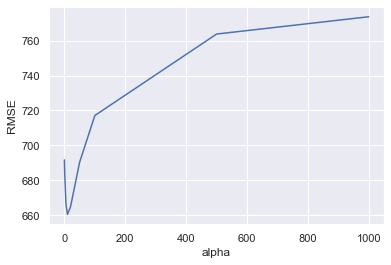

In [51]:
# Plot the test RMSE with respect to α.
case3A_rmse_dict_list = sorted(case3A_rmse_dict.items()) 
case3A_x, case3A_y = zip(*case3A_rmse_dict_list)
plt.plot(case3A_x, case3A_y)
plt.xlabel('alpha')
plt.ylabel('RMSE')
plt.show()

In [32]:
# best rmse
best_alpha = min(case3A_rmse_dict, key=case3A_rmse_dict.get)
print('best rmse is: ', case3A_rmse_dict[best_alpha])

best rmse is:  660.5612900111673


In [33]:
case3A_reg = linear_model.Ridge(alpha = best_alpha)
case3A_reg.fit(X_train_arr, Y_train_arr)
case3A_predict = case3A_reg.predict(X_test_arr)

# predictions and true outcome values for the first 20 data points in the testing data
for i in range(20):
    print('prediction: ', case3A_predict[i], '; true outcome: ', Y_test['life_post_consumer'][i])

prediction:  1068.333623849239 ; true outcome:  1183
prediction:  229.75531919984064 ; true outcome:  189
prediction:  2008.5588919213267 ; true outcome:  2327
prediction:  -102.87489949962924 ; true outcome:  76
prediction:  541.4576994726492 ; true outcome:  354
prediction:  606.459257558521 ; true outcome:  713
prediction:  414.98279829467697 ; true outcome:  204
prediction:  602.8105144219195 ; true outcome:  288
prediction:  500.1843850761295 ; true outcome:  555
prediction:  492.3066355810638 ; true outcome:  586
prediction:  508.37649961334796 ; true outcome:  446
prediction:  409.1300215282556 ; true outcome:  884
prediction:  730.467680433911 ; true outcome:  524
prediction:  561.0603282026203 ; true outcome:  672
prediction:  294.450897227684 ; true outcome:  23
prediction:  602.4828674601829 ; true outcome:  570
prediction:  1632.1827150344566 ; true outcome:  1361
prediction:  2698.882817822703 ; true outcome:  5934
prediction:  3841.6315284622815 ; true outcome:  2319
pred

# Q7 (Case 3B)
Construct a prediction model using the setting of Case 3B. You should consider at least the following values for the regularization coefficient (α): 0.01, 0.1, 1, 5, 10, 20, 50, 100, 500, 1000. Plot the test RMSE with respect to α. What is the best test RMSE? What is the predictions and the true outcome values for the first 20 data points in the testing data using the best α ?

In [34]:
# prediction model
case3B_rmse_dict = {}
for alpha in alpha_list: 
    case3B_reg = linear_model.Ridge(alpha = alpha)
    case3B_reg.fit(X_train_numerical_std_only_arr, de_mean_Y_train_arr)
    case3B_predict = case3B_reg.predict(X_test_numerical_std_only_arr) + Y_train_mean
    case3B_rmse = rmse_func(case3B_predict, Y_test_arr)
    
    case3B_rmse_dict[alpha] = case3B_rmse

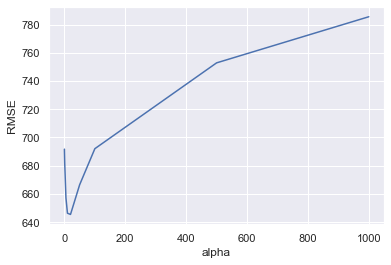

In [35]:
# Plot the test RMSE with respect to α.
case3B_rmse_dict_list = sorted(case3B_rmse_dict.items()) 
case3B_x, case3B_y = zip(*case3B_rmse_dict_list)
plt.plot(case3B_x, case3B_y)
plt.xlabel('alpha')
plt.ylabel('RMSE')
plt.show()

In [36]:
# best rmse
best_alpha = min(case3B_rmse_dict, key=case3B_rmse_dict.get)
print('best rmse is: ', case3B_rmse_dict[best_alpha])

best rmse is:  645.516812393874


In [37]:
case3B_reg = linear_model.Ridge(alpha = best_alpha)
case3B_reg.fit(X_train_arr, de_mean_Y_train_arr)
case3B_predict = case3B_reg.predict(X_test_arr) + Y_train_mean

# predictions and true outcome values for the first 20 data points in the testing data
for i in range(20):
    print('prediction: ', case3B_predict[i], '; true outcome: ', Y_test['life_post_consumer'][i])

prediction:  1141.5849608863002 ; true outcome:  1183
prediction:  234.13336380671728 ; true outcome:  189
prediction:  1859.2306088943733 ; true outcome:  2327
prediction:  -32.54724387392787 ; true outcome:  76
prediction:  589.7796566659478 ; true outcome:  354
prediction:  641.3317807846179 ; true outcome:  713
prediction:  456.9213415383058 ; true outcome:  204
prediction:  594.1984956283761 ; true outcome:  288
prediction:  521.7915569541216 ; true outcome:  555
prediction:  569.0720247196375 ; true outcome:  586
prediction:  534.4719695804067 ; true outcome:  446
prediction:  479.7454649206992 ; true outcome:  884
prediction:  805.4029368816167 ; true outcome:  524
prediction:  574.7172242203447 ; true outcome:  672
prediction:  375.8101722911425 ; true outcome:  23
prediction:  595.1652200120014 ; true outcome:  570
prediction:  1467.667228118834 ; true outcome:  1361
prediction:  2485.5766366606167 ; true outcome:  5934
prediction:  3705.300880724885 ; true outcome:  2319
pred

# Q8 (Case 3C)
Construct a prediction model using the setting of Case 3C. You should consider at least the following values for the regularization coefficient (α): 0.01, 0.1, 1, 5, 10, 20, 50, 100, 500, 1000. Plot the test RMSE with respect to α. What is the best test RMSE? What is the predictions and the true outcome values for the first 20 data points in the testing data using the best α ?

In [38]:
# prediction model
case3C_rmse_dict = {}
for alpha in alpha_list: 
    case3C_reg = linear_model.Ridge(alpha = alpha)
    case3C_reg.fit(X_train_arr, de_mean_Y_train_arr)
    case3C_predict = case3C_reg.predict(X_test_arr) + Y_train_mean
    case3C_rmse = rmse_func(case3C_predict, Y_test_arr)
    
    case3C_rmse_dict[alpha] = case3C_rmse

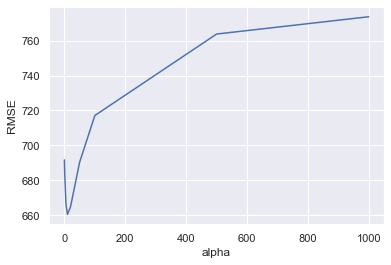

In [39]:
# Plot the test RMSE with respect to α.
case3C_rmse_dict_list = sorted(case3C_rmse_dict.items()) 
case3C_x, case3C_y = zip(*case3C_rmse_dict_list)
plt.plot(case3C_x, case3C_y)
plt.xlabel('alpha')
plt.ylabel('RMSE')
plt.show()

In [40]:
# best rmse
best_alpha = min(case3C_rmse_dict, key=case3C_rmse_dict.get)
print('best rmse is: ', case3C_rmse_dict[best_alpha])

best rmse is:  660.5612900111672


In [41]:
case3C_reg = linear_model.Ridge(alpha = best_alpha)
case3C_reg.fit(X_train_arr, de_mean_Y_train_arr)
case3C_predict = case3C_reg.predict(X_test_arr) + Y_train_mean

# predictions and true outcome values for the first 20 data points in the testing data
for i in range(20):
    print('prediction: ', case3C_predict[i], '; true outcome: ', Y_test['life_post_consumer'][i])

prediction:  1068.3336238492388 ; true outcome:  1183
prediction:  229.75531919984064 ; true outcome:  189
prediction:  2008.5588919213264 ; true outcome:  2327
prediction:  -102.87489949962924 ; true outcome:  76
prediction:  541.457699472649 ; true outcome:  354
prediction:  606.4592575585207 ; true outcome:  713
prediction:  414.98279829467697 ; true outcome:  204
prediction:  602.8105144219194 ; true outcome:  288
prediction:  500.18438507612905 ; true outcome:  555
prediction:  492.30663558106403 ; true outcome:  586
prediction:  508.37649961334796 ; true outcome:  446
prediction:  409.13002152825607 ; true outcome:  884
prediction:  730.4676804339109 ; true outcome:  524
prediction:  561.0603282026202 ; true outcome:  672
prediction:  294.45089722768375 ; true outcome:  23
prediction:  602.482867460183 ; true outcome:  570
prediction:  1632.1827150344561 ; true outcome:  1361
prediction:  2698.882817822703 ; true outcome:  5934
prediction:  3841.631528462281 ; true outcome:  2319

# Q9 (Case 3D)
Construct a prediction model using the setting of Case 3D. You should consider at least the following values for the regularization coefficient (α): 0.01, 0.1, 1, 5, 10, 20, 50, 100, 500, 1000. Plot the test RMSE with respect to α. What is the best test RMSE? What is the predictions and the true outcome values for the first 20 data points in the testing data using the best α ?

In [42]:
# prediction model
case3D_rmse_dict = {}
for alpha in alpha_list: 
    case3D_reg = linear_model.Ridge(alpha = alpha)
    case3D_reg.fit(X_train_std_arr, de_mean_Y_train_arr)
    case3D_predict = case3D_reg.predict(X_test_std_arr) + Y_train_mean
    case3D_rmse = rmse_func(case3D_predict, Y_test_arr)
    
    case3D_rmse_dict[alpha] = case3D_rmse

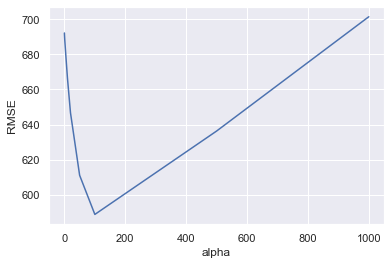

In [43]:
# Plot the test RMSE with respect to α.
case3D_rmse_dict_list = sorted(case3D_rmse_dict.items()) 
case3D_x, case3D_y = zip(*case3D_rmse_dict_list)
plt.plot(case3D_x, case3D_y)
plt.xlabel('alpha')
plt.ylabel('RMSE')
plt.show()

In [44]:
# best rmse
best_alpha = min(case3D_rmse_dict, key=case3D_rmse_dict.get)
print('best rmse is: ', case3D_rmse_dict[best_alpha])

best rmse is:  588.793465752767


In [45]:
case3D_reg = linear_model.Ridge(alpha = best_alpha)
case3D_reg.fit(X_train_std_arr, de_mean_Y_train_arr)
case3D_predict = case3D_reg.predict(X_test_std_arr) + Y_train_mean

# predictions and true outcome values for the first 20 data points in the testing data
for i in range(20):
    print('prediction: ', case3D_predict[i], '; true outcome: ', Y_test['life_post_consumer'][i])

prediction:  1040.5001226108072 ; true outcome:  1183
prediction:  278.46504979772 ; true outcome:  189
prediction:  1997.724464270033 ; true outcome:  2327
prediction:  -21.14036501815758 ; true outcome:  76
prediction:  554.2152570974526 ; true outcome:  354
prediction:  602.8406419024143 ; true outcome:  713
prediction:  337.52346959154676 ; true outcome:  204
prediction:  599.4357852626588 ; true outcome:  288
prediction:  470.29370415993503 ; true outcome:  555
prediction:  500.7241404018718 ; true outcome:  586
prediction:  511.148619120353 ; true outcome:  446
prediction:  387.74355349650676 ; true outcome:  884
prediction:  700.0895765181288 ; true outcome:  524
prediction:  532.2228096919928 ; true outcome:  672
prediction:  255.183117783645 ; true outcome:  23
prediction:  653.3563783030606 ; true outcome:  570
prediction:  1728.1691916931402 ; true outcome:  1361
prediction:  2775.002710950044 ; true outcome:  5934
prediction:  3174.7922518929345 ; true outcome:  2319
predic

# Q10 (Case 4)
Construct a prediction model using the setting of Case 4. You should consider at least the following values for the regularization coefficient (α): 0.01, 0.1, 1, 5, 10, 20, 50, 100, 500, 1000. Plot the test RMSE with respect to α. What is the best test RMSE? What is the predictions and the true outcome values for the first 20 data points in the testing data using the best α ?

In [46]:
# prediction model
case4_rmse_dict = {}
for alpha in alpha_list: 
    case4_reg = linear_model.Lasso(alpha = alpha)
    case4_reg.fit(X_train_numerical_std_only_arr, de_mean_Y_train_arr)
    case4_predict = case4_reg.predict(X_test_numerical_std_only_arr) + Y_train_mean
    case4_rmse = rmse_func(case4_predict, Y_test_arr)
    
    case4_rmse_dict[alpha] = case4_rmse

/Users/michelle/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 47976963.79253879, tolerance: 32249.892376
  positive)
/Users/michelle/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4456870.003093511, tolerance: 32249.892376
  positive)


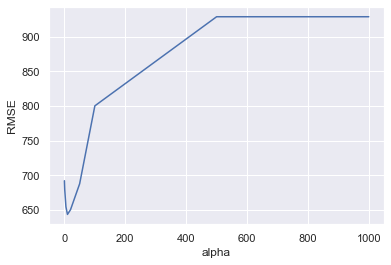

In [47]:
# Plot the test RMSE with respect to α.
case4_rmse_dict_list = sorted(case4_rmse_dict.items()) 
case4_x, case4_y = zip(*case4_rmse_dict_list)
plt.plot(case4_x, case4_y)
plt.xlabel('alpha')
plt.ylabel('RMSE')
plt.show()

In [48]:
# best rmse
best_alpha = min(case4_rmse_dict, key=case4_rmse_dict.get)
print('best rmse is: ', case4_rmse_dict[best_alpha])

best rmse is:  643.3855039398903


In [49]:
case4_reg = linear_model.Lasso(alpha = best_alpha)
case4_reg.fit(X_train_arr, de_mean_Y_train_arr)
case4_predict = case4_reg.predict(X_test_arr) + Y_train_mean

# predictions and true outcome values for the first 20 data points in the testing data
for i in range(20):
    print('prediction: ', case4_predict[i], '; true outcome: ', Y_test['life_post_consumer'][i])

prediction:  1251.4405053593619 ; true outcome:  1183
prediction:  255.45495851335022 ; true outcome:  189
prediction:  2146.839402243097 ; true outcome:  2327
prediction:  -86.93151727695727 ; true outcome:  76
prediction:  437.6208533632289 ; true outcome:  354
prediction:  715.8034901060197 ; true outcome:  713
prediction:  434.1051807964154 ; true outcome:  204
prediction:  444.87806145559625 ; true outcome:  288
prediction:  664.82715592965 ; true outcome:  555
prediction:  563.1894415734931 ; true outcome:  586
prediction:  406.06776633061077 ; true outcome:  446
prediction:  476.4377256769676 ; true outcome:  884
prediction:  925.2375588087532 ; true outcome:  524
prediction:  607.2922431202459 ; true outcome:  672
prediction:  326.3773714055194 ; true outcome:  23
prediction:  542.9803800666762 ; true outcome:  570
prediction:  1709.330201104854 ; true outcome:  1361
prediction:  2664.404022496726 ; true outcome:  5934
prediction:  3727.2675096862104 ; true outcome:  2319
predi

# Q11
Summarize the best RMSE of all cases and discuss your findings. How should we preprocess the features?

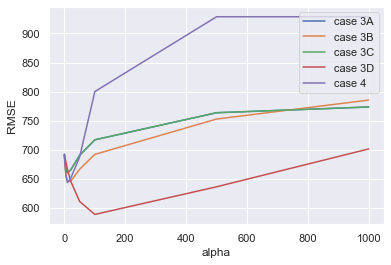

In [59]:
plt.plot(case3A_x, case3A_y, label="case 3A")
plt.plot(case3B_x, case3B_y, label="case 3B")
plt.plot(case3C_x, case3C_y, label="case 3C")
plt.plot(case3D_x, case3D_y, label="case 3D")
plt.plot(case4_x, case4_y, label="case 4")

plt.xlabel('alpha')
plt.ylabel('RMSE')
plt.legend()
plt.show()

## Discussion

上圖 X 軸為 alpha 值，Y 軸為 RMSE 值，各線條分別為 case 3A、3B、3C、3D、4 在不同情況下計算出來的 RMSE 與 alpha 值，而 case 3C 跟 case 3A 的 tunning 結果幾乎一致。
我們可以透過找 RMSE 的最小值來看哪一個 k 表現最好。
當 alpha 等於 0 時，各case 表現程度接近，但隨著 alpha 的提升可以看出 case 3D 的表現最好，在 alpha 從 0 提升至 100 時，RMSE 下降幅度最為劇烈，雖然 RMSE 在 100 以後隨著 alpha 值上升，但是其表現仍優於其他四個 case。另外，case 4 相較於 case 3 們 RMSE 都較高。
可以推估，Ridge regression 的表現較 Lasso regression 好，而當 feature 進行標準化，Y 做 de-mean 處理後表現會更好。